## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [3]:
ab_data.shape

(294478, 5)

In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


In [5]:
unique = pd.unique(ab_data['user_id'])
len(unique)

290584

## There is 29K Unique User ID's

In [6]:
converted = ab_data['converted'] == 1
ab_data[converted].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35237 entries, 4 to 294443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       35237 non-null  int64 
 1   timestamp     35237 non-null  object
 2   group         35237 non-null  object
 3   landing_page  35237 non-null  object
 4   converted     35237 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


## There is 35K Converted users out of nearly 294K users

The number of times the `new_page` and `treatment` don't line up :)

In [7]:
no_match = ((ab_data['group'] == 'treatment') == (ab_data['landing_page'] == 'new_page')) == False
ab_data[no_match].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 22 to 294331
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       3893 non-null   int64 
 1   timestamp     3893 non-null   object
 2   group         3893 non-null   object
 3   landing_page  3893 non-null   object
 4   converted     3893 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 136.9+ KB


## There is nearly 4K records where the group is 'Treatment' and the landing page is 'New Page' don't line up

In [8]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


## There is no null values what so ever in this dataset, looks like we are good :)

In [9]:
df2 = ab_data.drop(ab_data[no_match].index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

## All Evel Data are removed successfully :)

How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].unique().size

290584

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Removing **one** of the rows with a duplicate **user_id**

In [14]:
df2.drop(df2['user_id'].duplicated().index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 16.0+ MB


In [15]:
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
p_convert = df2['converted'].mean()
p_convert

0.11959667567149027

Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
p_convert_control = df2['group'] == 'control'
df2[p_convert_control]['converted'].mean()

0.1203863045004612

Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
p_convert_treatment = df2['group'] == 'treatment'
df2[p_convert_treatment]['converted'].mean()

0.11880724790277405

What is the probability that an individual received the new page?

In [19]:
(df2['landing_page'] == 'new_page').mean()

0.5000636646764286

There is no what so ever sufficient evidence that suggests that the treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## My null hypothesis will be that the conversion rate of the old page is less than or equal to that of the new page (**$p_{old}$** <= **$p_{new}$**)
## This means that the alternative hypothesis will be that the conversion rate for the old page is greater than the new page (**$p_{old}$** > **$p_{new}$**)  

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new =  df2.converted.mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

## From the $p$ values obtained above apparently the conversion rates are the same for the new page and the old page

c. What is $n_{new}$?

In [22]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_new

145311

d. What is $n_{old}$?

In [23]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

Simulating $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.

In [30]:
new_page_converted = np.random.binomial(n_new, p_new, n_new)/n_old
new_page_converted.mean()

0.11962610837279801

Simulating $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.

In [32]:
old_page_converted = np.random.binomial(n_old, p_old, n_old)/n_old
old_page_converted.mean()

0.1195936738199103

In [25]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
obs_diff

-0.0015790565976871451

Simulating 10,000 $p_{new}$ - $p_{old}$ values using this same process

In [26]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

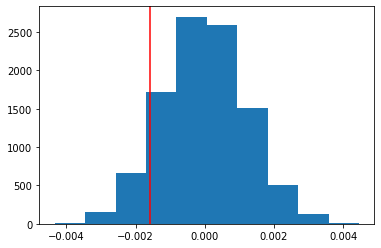

In [35]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color = 'red')
plt.show()

What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs > obs_diff).mean()

0.8997

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
convert_old = len(df2.query('converted==1 and landing_page=="old_page"'))
convert_new = len(df2.query('converted==1 and landing_page=="new_page"'))
sm.stats.proportions_ztest([convert_new, convert_old], [n_new.mean(), n_old.mean()], alternative = 'smaller')

(-1.3116075339133115, 0.09482629485940902)

The -1.31 z-score means that 1% more of the 'new_page' users converted compared to the 'old_page' users, a p-value of 0.095 suggests that the diffrence between conversion rates is of weak statistic significance :)

<a id='regression'></a>
### Part III - A regression approach

a. Since each row is either a conversion or no conversion, Logestic Regression is best fit for this case :)

b. The goal is to use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.

In [ ]:
## Creating Dummy Data, and the 'intercept'
ab_data['intercept'] = 1
ab_data['ab_page'] = 1
ab_data['ab_page'] = pd.get_dummies(ab_data['group'] == 'control')
ab_data.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Using **statsmodels** to import regression model.

In [ ]:
#%pip install statsmodels

In [ ]:
lm = sm.Logit(ab_data['converted'], ab_data[['intercept', 'ab_page']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:               7.093e-06
Time:                        16:49:05   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**?  Why does it differ from the value found in **Part II**?<br><br>

## 0.216, wich suggests that the page wether treatment or control is not statsticaly determenant to whether a user converts

It's almost always useful to consider more contributing factors that affect the exeplanatory variable. (Considering of course running necessary tests to see if they affect it and how much is that effect)

In [ ]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'))

In [ ]:
df_new.head(10)

,country,timestamp,group,landing_page,converted
user_id,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1


In [ ]:
### Creating the necessary dummy variables
df_new['intercept'] = 1
df_new['ab_page'] = 1
df_new['ab_page'] = pd.get_dummies(df_new['group'] == 'control')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [ ]:
pd.get_dummies(df_new['country']).head()

,CA,UK,US
user_id,,,
630000,0,0,1
630001,0,0,1
630002,0,0,1
630003,0,0,1
630004,0,0,1


In [ ]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis = 1)
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0
630005,US,2017-01-17 21:22:25.940766,treatment,new_page,1,1,1,0,0
630006,US,2017-01-14 05:13:51.962356,treatment,new_page,0,1,1,0,0
630008,US,2017-01-11 16:11:11.131461,control,old_page,0,1,0,0,0
630009,US,2017-01-05 23:35:15.820565,control,old_page,1,1,0,0,0


In [ ]:
lm = sm.Logit(df_new['converted'], df_new[['intercept','CA', 'UK', 'ab_page']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:               2.324e-05
Time:                        16:49:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

In [ ]:
np.exp(-0.0408), np.exp(0.0099), np.exp(-0.015) 

(0.9600211149716509, 1.0099491671175422, 0.9851119396030626)

In [ ]:
1/ np.exp(-0.0408), 1/ np.exp(-0.015)

(1.0416437559600236, 1.015113064615719)

## This means that it's 1.0099 more likely that a user will convert if he/she are from the UK rather than the US but 1.04 less likely to convert if from Canada rather than the US, holding all other factors constant

In [ ]:
df_new['country_page_CA'] = df_new['ab_page'] * df_new['CA']

In [ ]:
### Fitting the Linear Model
lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','CA','UK', 'country_page_CA']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:               2.827e-05
Time:                        16:49:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1980
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9906      0.009   -221.524      0.000      -2.008      -1.973
ab_page            -0.0123      0.012     -1.048      0.295      -0.035       0.011
CA                 -0.0134      0.038     -0.357      0.721      -0.087       0.060
UK                  0.0099      0.013      0.744      0.457      -0.016       0.036
country_page_CA    -0.0552      0.053     -1.035      0.301      -0.160       0.049
===================================================================================
"""

In [ ]:
1/ np.exp(-0.0552)

1.0567519439306503

## This means that it's 1.06 less likely that a user will convert if he/she is in Canada and was placed in the treatment group, holding all other factors constant

In [ ]:
df_new['country_page_UK'] = df_new['ab_page'] * df_new['UK']
lm = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK','CA', 'country_page_UK']])
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:               3.126e-05
Time:                        16:49:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1555
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -1.9850      0.009   -209.690      0.000      -2.004      -1.966
ab_page            -0.0236      0.013     -1.786      0.074      -0.049       0.002
UK                 -0.0072      0.019     -0.387      0.699      -0.044       0.029
CA                 -0.0407      0.027     -1.515      0.130      -0.093       0.012
country_page_UK     0.0344      0.026      1.306      0.192      -0.017       0.086
===================================================================================
"""

In [ ]:
np.exp(0.0344)

1.0349985233486143

## This means that it's 1.035 more likely that the user will convert if he/she is in the UK and in the treatment group, holding all other factors constant

<a id='conclusions'></a>
## Conclusions

- The page wether treatment or control is not statsticaly determenant to whether a user converts.
- It's 1.0099 more likely that a user will convert if he/she are from the UK rather than the US but 1.04 less likely to convert if from Canada rather than the US, holding all other factors constant.
- It's suggested that you launch the new page in the UK, US and to keep the old page in Canada :)
